In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage.segmentation import watershed
from skimage.segmentation import clear_border
from skimage.measure import label
from skimage.feature import canny
from skimage.color import rgb2gray
from google.colab.patches import cv2_imshow

def task_1(image_path):
    image = cv2.imread(image_path)
    cv2_imshow(image)

    height, width, channels = image.shape
    print(f"Image Size: {width}x{height}, Channels: {channels}")


    total_pixels = height * width
    print(f"Total Pixels: {total_pixels}")

    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print("RGB Image")
    cv2_imshow(image_rgb)

    # Convert RGB to Grayscale
    gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
    print("Grayscale Image")
    cv2.imwrite('gray_image.jpg', gray_image)
    cv2_imshow(gray_image)

    # Convert Grayscale to Binary using Otsu’s Thresholding
    thresh_val, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    print("Binary Image")
    cv2_imshow(binary_image)

    # Count the number of black pixels
    black_pixel_count = np.sum(binary_image == 0)
    print(f"Black Pixels Count: {black_pixel_count}")

task_1('test.png')

ModuleNotFoundError: No module named 'google.colab'

Sobel Edge Detection


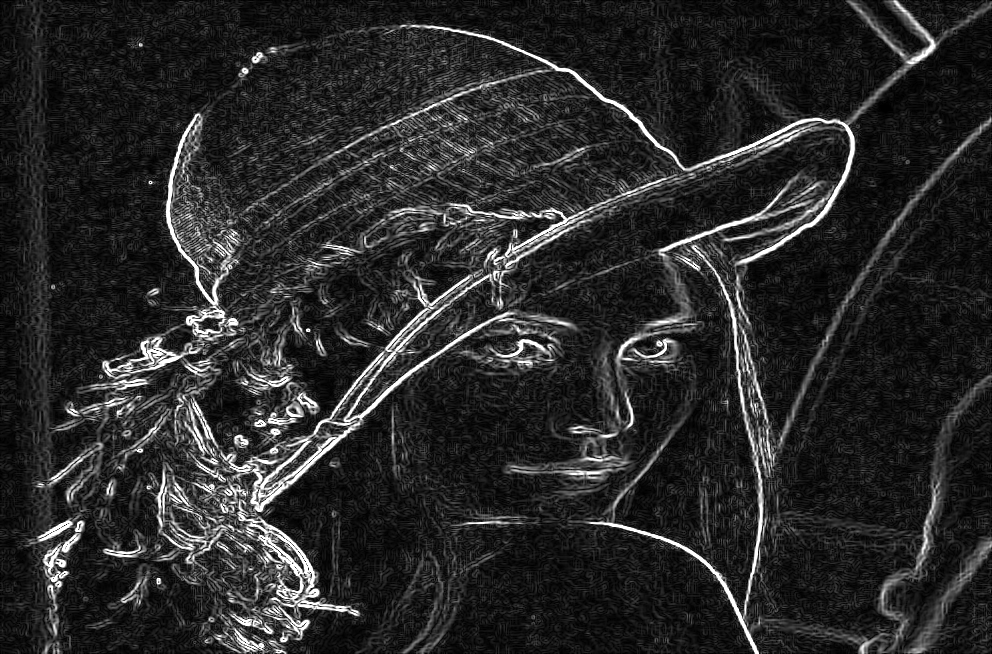

Prewitt Edge Detection


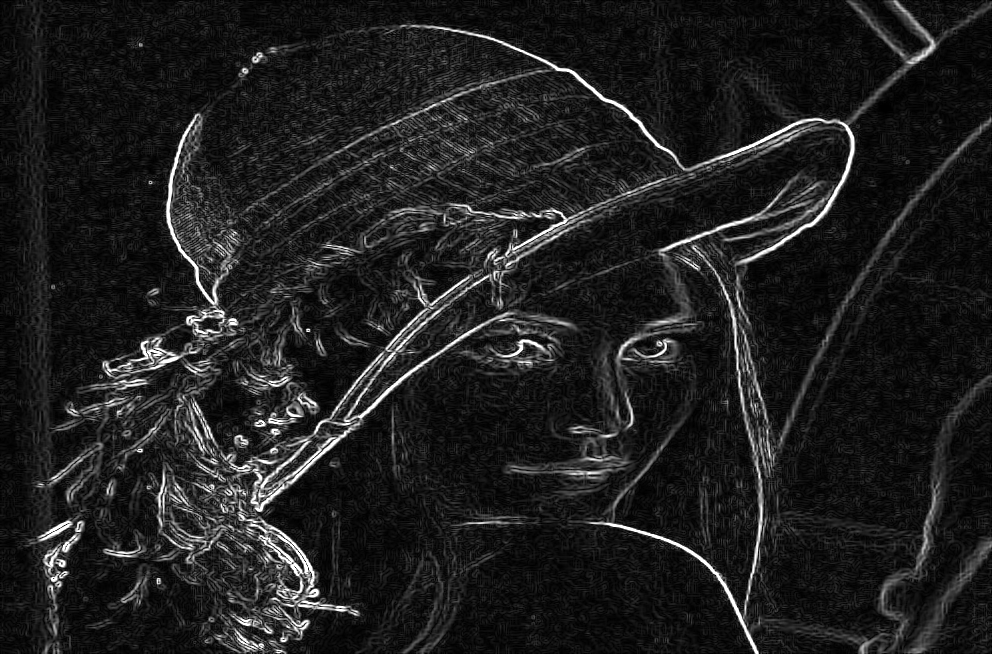

Roberts Cross Edge Detection


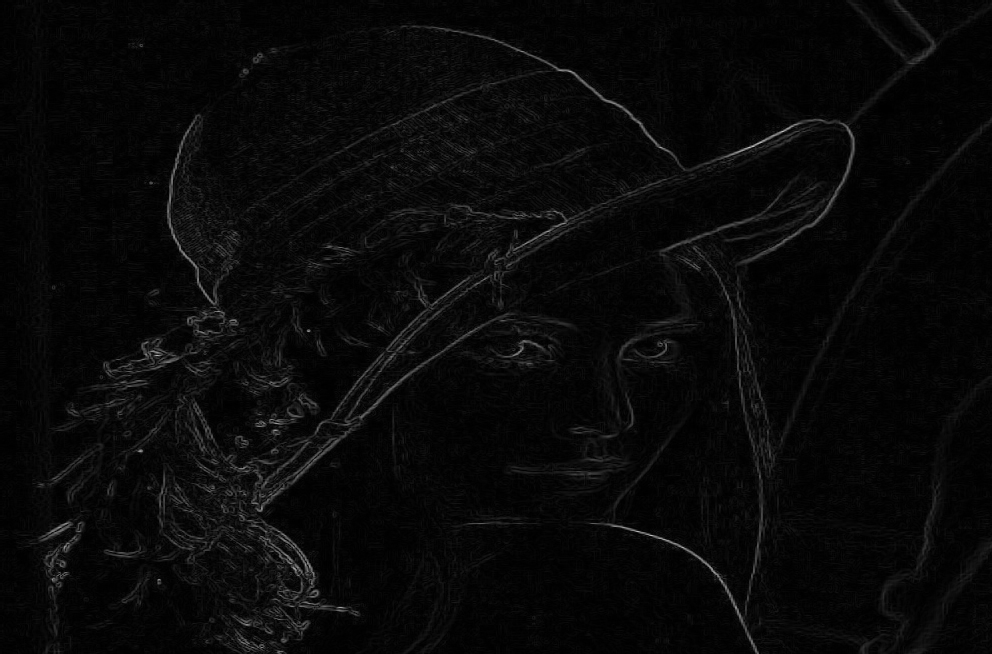

Canny Edge Detection


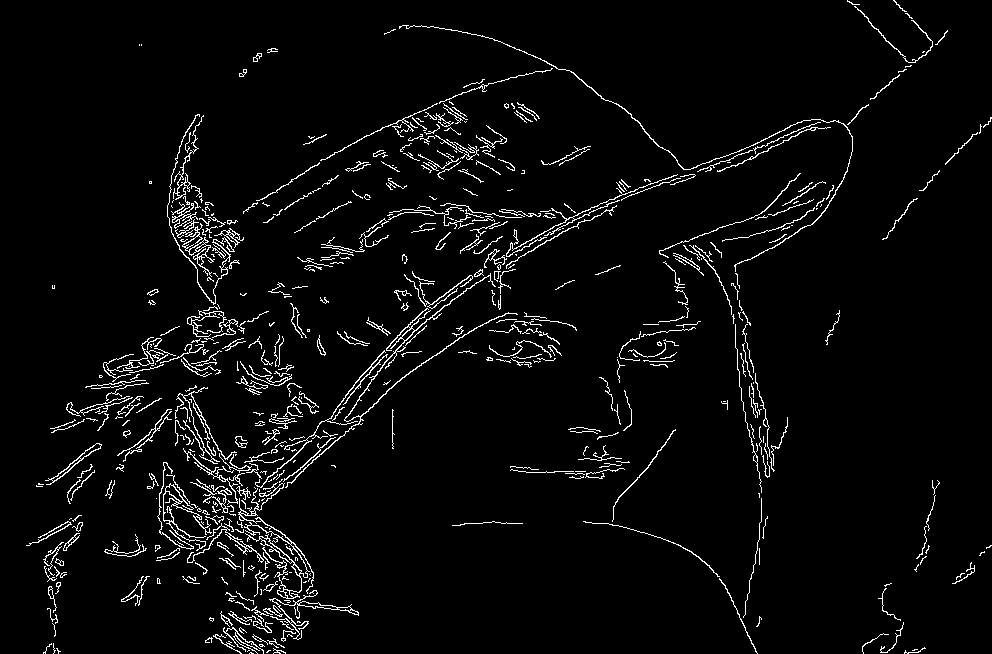

Global Thresholding


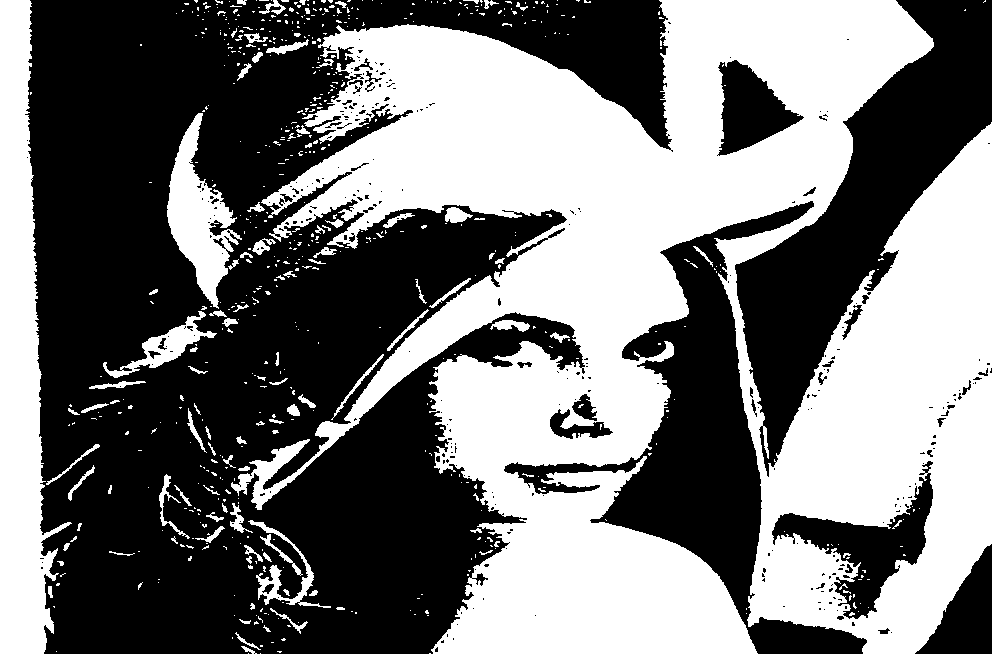

Adaptive Thresholding


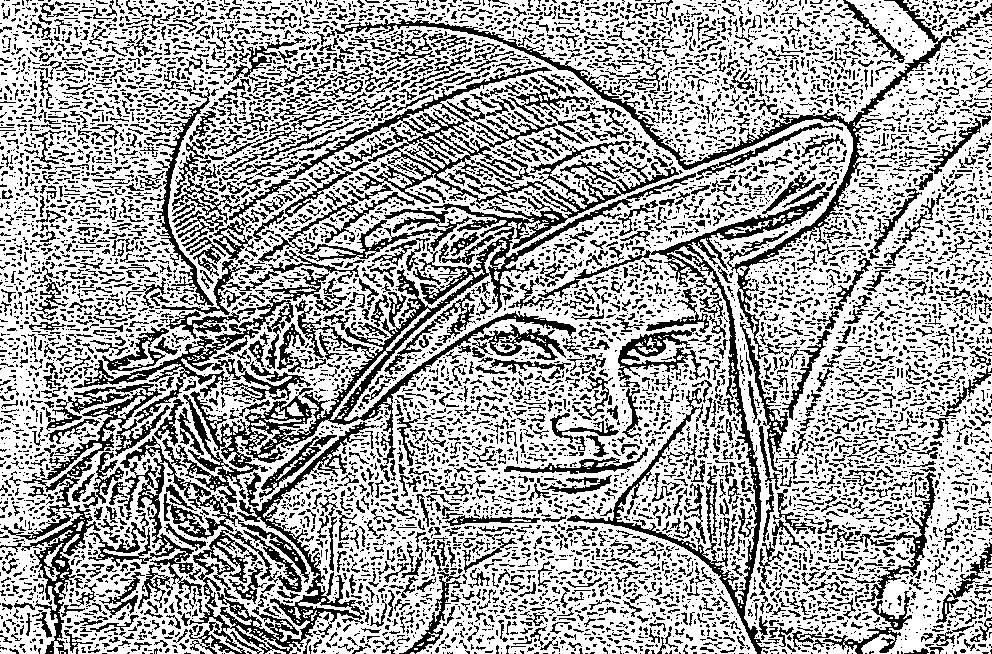

Canny Edge Detection for Segmentation


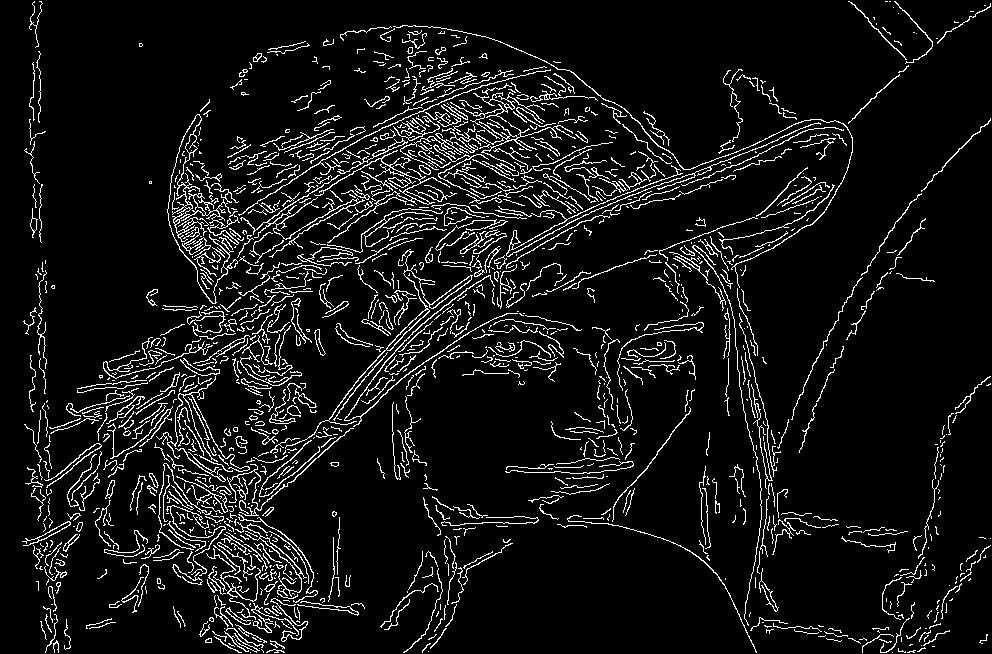

Watershed Algorithm for Region-Based Segmentation


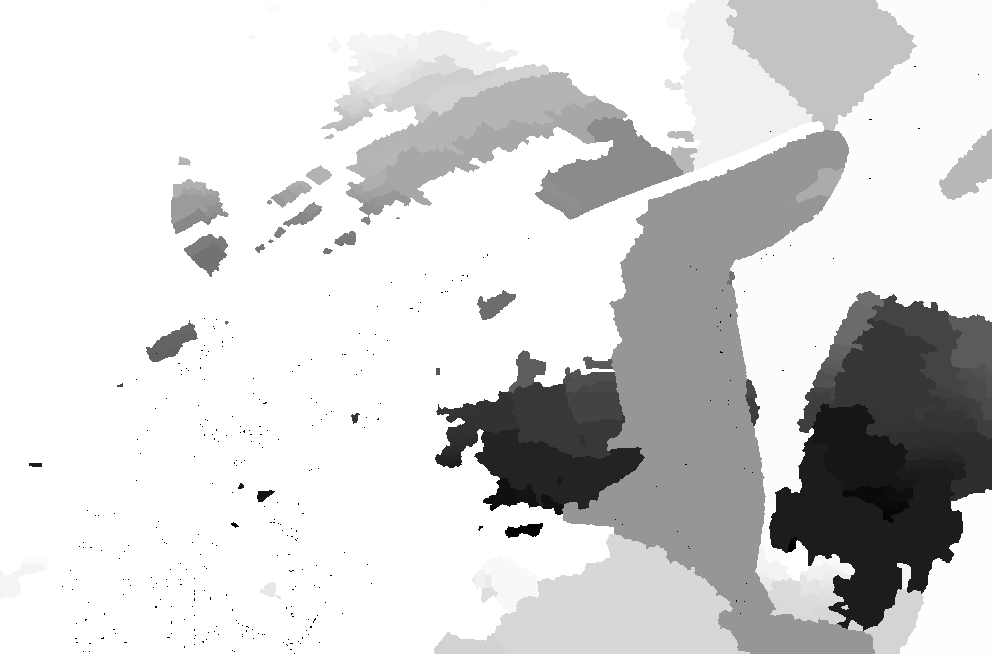

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage.segmentation import watershed
from skimage.segmentation import clear_border
from skimage.measure import label
from skimage.feature import canny
from skimage.color import rgb2gray
from google.colab.patches import cv2_imshow


def task_2(image_path='gray_image.jpg'):
    # Read the grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Sobel Edge Detection
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.magnitude(sobelx, sobely)
    print("Sobel Edge Detection")
    cv2_imshow(sobel)

    # Prewitt Edge Detection
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    prewittx = cv2.filter2D(image, cv2.CV_32F, kernelx)
    prewitty = cv2.filter2D(image, cv2.CV_32F, kernely)
    prewitt = cv2.magnitude(prewittx, prewitty)
    print("Prewitt Edge Detection")
    cv2_imshow(prewitt)

    # Roberts Cross Edge Detection
    roberts_kernelx = np.array([[1, 0], [0, -1]])
    roberts_kernely = np.array([[0, 1], [-1, 0]])
    robertsx = cv2.filter2D(image, cv2.CV_32F, roberts_kernelx)
    robertsy = cv2.filter2D(image, cv2.CV_32F, roberts_kernely)
    roberts = cv2.magnitude(robertsx, robertsy)
    print("Roberts Cross Edge Detection")
    cv2_imshow(roberts)

    # Canny Edge Detection
    canny_edges = cv2.Canny(image, 100, 200)
    print("Canny Edge Detection")
    cv2_imshow(canny_edges)

    thresh = threshold_otsu(image)
    global_thresh = (image > thresh).astype(np.uint8) * 255
    print("Global Thresholding")
    cv2_imshow(global_thresh)

    # Adaptive Thresholding
    adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                            cv2.THRESH_BINARY, 11, 2)
    print("Adaptive Thresholding")
    cv2_imshow(adaptive_thresh)

    # Canny Edge Detection for Segmentation
    segmented_canny = canny(image)
    print("Canny Edge Detection for Segmentation")
    cv2_imshow(segmented_canny.astype(np.uint8) * 255)

    # Watershed Algorithm for Region-Based Segmentation
    markers = label(image < thresh)
    watershed_segmentation = watershed(image, markers, mask=image)
    print("Watershed Algorithm for Region-Based Segmentation")
    cv2_imshow(watershed_segmentation.astype(np.uint8) * 255)



task_2()
